In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Preprocessing - Stage 2

In [72]:
df = pd.read_csv('datasets/clean_cair_cvd_revision_1_3.csv')
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,...,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,SBP,DBP
0,F,32.0,69.1000,1.71,23.6,86.2,248.0,78.0,111.0,N,...,N,INTERMEDIARY,0.504,125.0,79.0,Elevated,140.0,17.93,125,79
1,F,55.0,118.7000,1.69,41.6,82.5,162.0,50.0,135.0,Y,...,Y,HIGH,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,139,70
2,M,46.0,86.6145,1.83,26.9,106.7,103.0,73.0,114.0,N,...,Y,INTERMEDIARY,0.583,104.0,77.0,Normal,0.0,12.64,104,77
3,M,44.0,108.3000,1.80,33.4,96.6,134.0,46.0,91.0,N,...,Y,INTERMEDIARY,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,140,83
4,F,32.0,99.5000,1.86,28.8,102.7,146.0,64.0,141.0,Y,...,N,INTERMEDIARY,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,144,83


In [73]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)',
       'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Smoking Status',
       'Diabetes Status', 'Physical Activity Level', 'Family History of CVD',
       'CVD Risk Level', 'Waist-to-Height Ratio', 'Systolic BP',
       'Diastolic BP', 'Blood Pressure Category', 'Estimated LDL (mg/dL)',
       'CVD Risk Score', 'SBP', 'DBP'],
      dtype='object')

In [74]:
numeric_dtypes = df.select_dtypes(include='number')
object_dtypes = df.select_dtypes(include='object')

print(f'features(numeric) : {numeric_dtypes.columns}\n')
print(f'features(object) : {object_dtypes.columns}')

features(numeric) : Index(['Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)',
       'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Waist-to-Height Ratio',
       'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)',
       'CVD Risk Score', 'SBP', 'DBP'],
      dtype='object')

features(object) : Index(['Sex', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level',
       'Family History of CVD', 'CVD Risk Level', 'Blood Pressure Category'],
      dtype='object')


In [75]:
numeric_dtypes.isnull().sum()

Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Waist-to-Height Ratio           0
Systolic BP                     0
Diastolic BP                    0
Estimated LDL (mg/dL)           0
CVD Risk Score                  0
SBP                             0
DBP                             0
dtype: int64

In [76]:
object_dtypes.isnull().sum()

Sex                        0
Smoking Status             0
Diabetes Status            0
Physical Activity Level    0
Family History of CVD      0
CVD Risk Level             0
Blood Pressure Category    0
dtype: int64

In [77]:
df_copy = df.copy()

# Independent Variables of Regression 

In [78]:
X_feature_regession = df_copy.drop('CVD Risk Level', axis=1)
X_feature_regession.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)',
       'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Smoking Status',
       'Diabetes Status', 'Physical Activity Level', 'Family History of CVD',
       'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score',
       'SBP', 'DBP'],
      dtype='object')

# Independent Variables of Classification

In [79]:
X_feature_classification = df_copy.drop('CVD Risk Score', axis=1)
X_feature_classification.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)',
       'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Smoking Status',
       'Diabetes Status', 'Physical Activity Level', 'Family History of CVD',
       'CVD Risk Level', 'Waist-to-Height Ratio', 'Systolic BP',
       'Diastolic BP', 'Blood Pressure Category', 'Estimated LDL (mg/dL)',
       'SBP', 'DBP'],
      dtype='object')

# Analysis

In [80]:
correlations_of_features = numeric_dtypes.corr()
correlations_of_features

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score,SBP,DBP
Age,1.000000,0.018040,0.030795,0.021336,0.071732,0.003376,0.033274,0.097110,0.059224,0.088784,0.057001,-0.008543,0.052040,0.086426,0.061271
Weight (kg),0.018040,1.000000,0.011329,0.616166,0.041791,0.009783,-0.003674,0.038236,0.018503,0.009419,0.002362,0.007081,0.378080,0.010137,0.003877
Height (m),0.030795,0.011329,1.000000,-0.157216,0.020091,0.000853,-0.000783,0.020353,-0.404647,0.020843,0.012189,0.001648,-0.081228,0.016107,0.018683
BMI,0.021336,0.616166,-0.157216,1.000000,0.029922,0.018805,-0.008541,0.037683,0.092436,0.020344,0.022428,0.012133,0.591439,0.023802,0.021531
Abdominal Circumference (cm),0.071732,0.041791,0.020091,0.029922,1.000000,0.060114,-0.000973,0.028007,0.854191,0.069670,0.038408,0.048085,0.082306,0.070944,0.030258
Total Cholesterol (mg/dL),0.003376,0.009783,0.000853,0.018805,0.060114,1.000000,0.056059,0.009410,0.045955,0.042381,0.051174,0.915031,0.488003,0.039013,0.048699
HDL (mg/dL),0.033274,-0.003674,-0.000783,-0.008541,-0.000973,0.056059,1.000000,0.059433,0.014455,0.072481,0.034012,-0.194761,0.044772,0.068404,0.030702
Fasting Blood Sugar (mg/dL),0.097110,0.038236,0.020353,0.037683,0.028007,0.009410,0.059433,1.000000,0.030962,0.079862,0.082196,0.003479,0.073380,0.083926,0.088392
Waist-to-Height Ratio,0.059224,0.018503,-0.404647,0.092436,0.854191,0.045955,0.014455,0.030962,1.000000,0.063883,0.036075,0.033283,0.109545,0.068029,0.029847
Systolic BP,0.088784,0.009419,0.020843,0.020344,0.069670,0.042381,0.072481,0.079862,0.063883,1.000000,0.061475,0.025921,0.462791,0.980473,0.072077


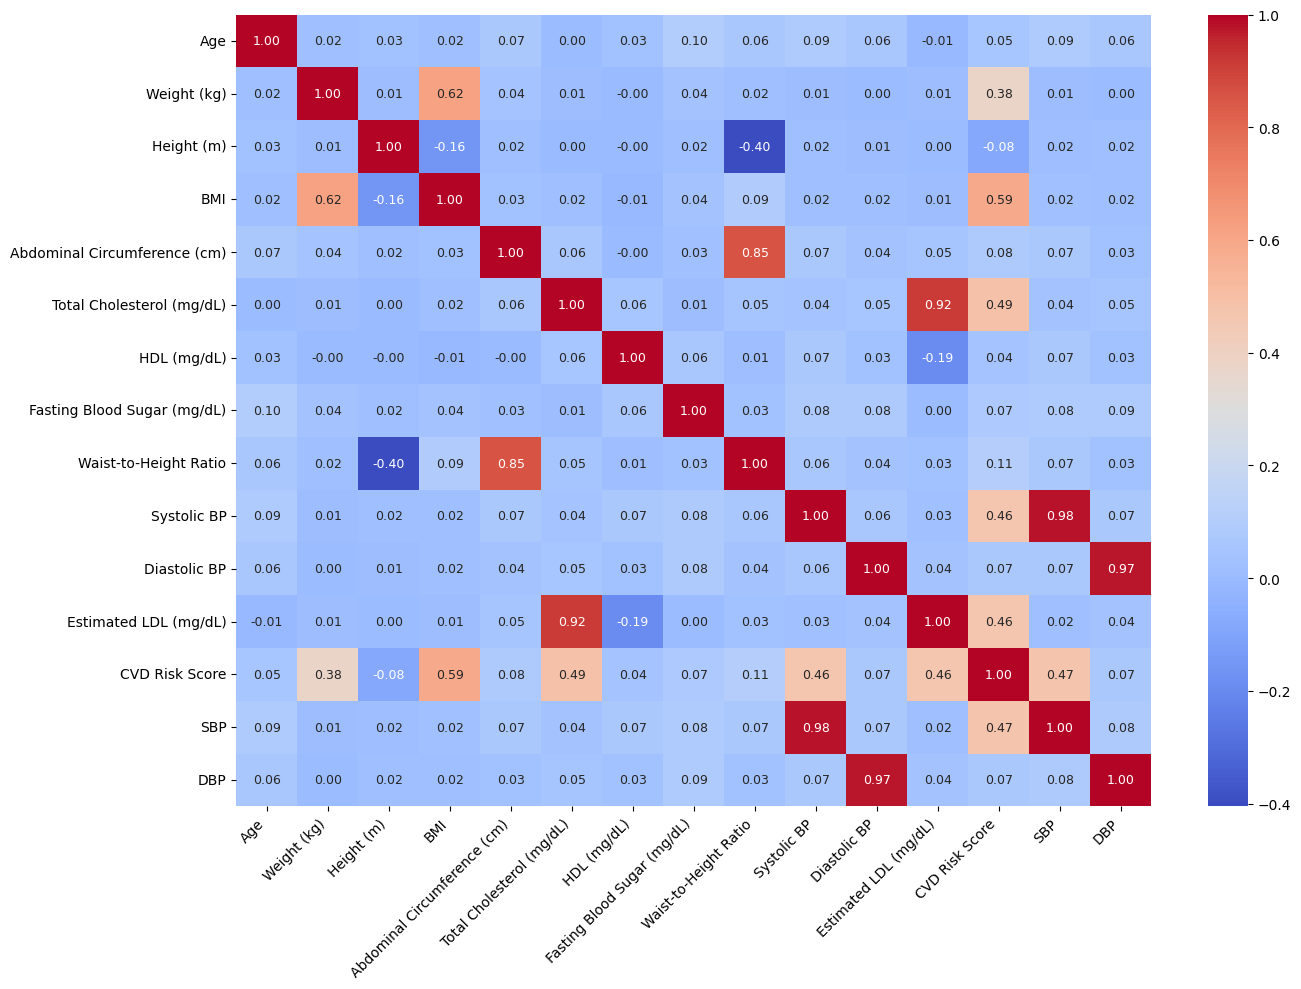

In [81]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlations_of_features,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={'size':9}, annot=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()       
plt.show()

In [82]:
# Correlation correspondent to 'CVD Risk Score'
correlations = X_feature_regession.select_dtypes(include=['int64', 'float64']).corr()
correlation_cvd_risk_score = correlations['CVD Risk Score'].sort_values(ascending=False)
pd.DataFrame(correlation_cvd_risk_score)

,CVD Risk Score
CVD Risk Score,1.000000
BMI,0.591439
Total Cholesterol (mg/dL),0.488003
SBP,0.473925
Systolic BP,0.462791
Estimated LDL (mg/dL),0.462298
Weight (kg),0.378080
Waist-to-Height Ratio,0.109545
Abdominal Circumference (cm),0.082306
Fasting Blood Sugar (mg/dL),0.073380


In [83]:
correlated_features = []
correlated_features_without_cvd_risk_score = []

correlated_values = []
for features, values in correlation_cvd_risk_score.items():
    correlated_features.append(features)
    correlated_values.append(abs(values))


The pie chart illustrates the relative proportion of selected features that exhibit correlation with the cardiovascular disease (CVD) risk score. Features with larger segments indicate stronger associations with the risk score, highlighting their potential influence on cardiovascular risk estimation. This visualization provides an intuitive overview of how different clinical variables contribute to the overall risk profile.

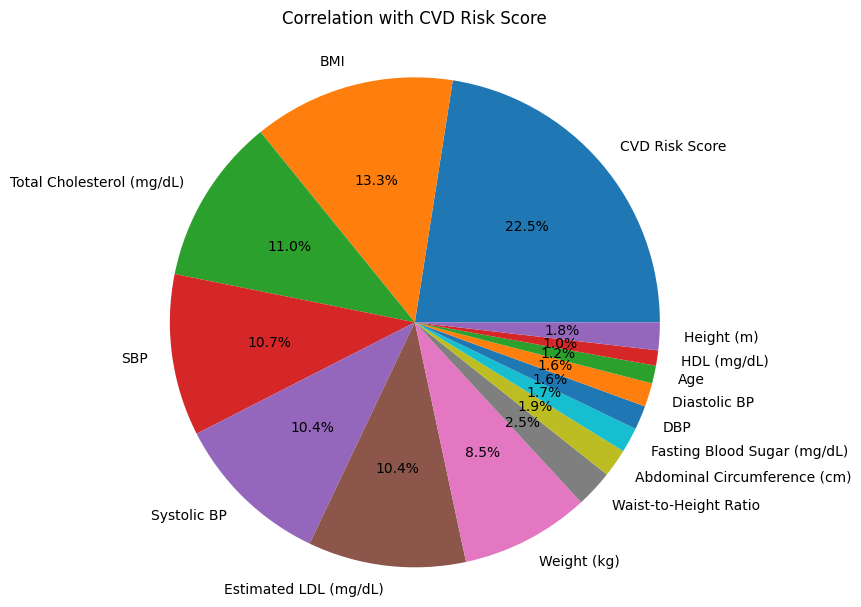

In [84]:
# CVD Risk Score Correlated Pie Chart 
plt.figure(figsize=(10, 7))
plt.pie(
    correlated_values, 
    labels=correlated_features,
    autopct='%1.1f%%'
    )

plt.title("Correlation with CVD Risk Score\n")
plt.axis('equal')
plt.show()

This table presents the distribution of cardiovascular disease risk levels within the dataset. The results indicate that the number of individuals varies across different risk categories, with certain risk levels being more prevalent than others. This distribution highlights the presence of class imbalance, which is an important consideration for subsequent classification modeling and performance evaluation.

In [85]:
# Risk Level counts - Dataframe
risk_level_count = df['CVD Risk Level'].value_counts()
df_risk_level = pd.DataFrame(risk_level_count)
df_risk_level

,count
CVD Risk Level,
HIGH,728
INTERMEDIARY,581
LOW,220


The bar chart illustrates the distribution of cardiovascular disease risk levels in the dataset. The majority of individuals belong to the low-risk category, followed by moderate- and high-risk groups.

Text(0.5, 1.0, 'Distribution of CVD(Cardiovascular) Risk Levels')

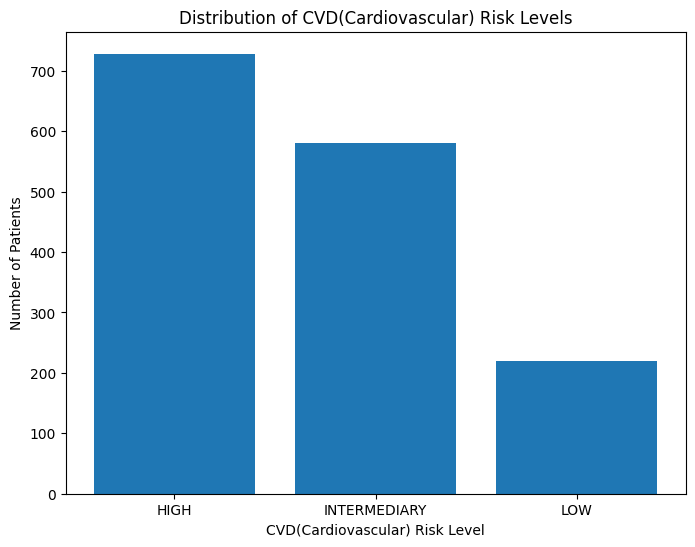

In [86]:
# Risk Level visualization from the Dataset
plt.figure(figsize=(8, 6))
plt.bar(risk_level_count.index, risk_level_count.values)
plt.xlabel('CVD(Cardiovascular) Risk Level')
plt.ylabel('Number of Patients')
plt.title('Distribution of CVD(Cardiovascular) Risk Levels')

# Dependent variable for Regression

In [87]:
# Selection of Dependent/Target variable
y_target_regression = df['CVD Risk Score']
pd.DataFrame(y_target_regression)

,CVD Risk Score
0,17.930
1,20.510
2,12.640
3,16.360
4,17.880
...,...
1524,14.300
1525,14.805
1526,18.251
1527,15.316


# Dependent variable for Classification

In [88]:
# Selection of Dependent/Target variable
y_target_classification = df['CVD Risk Level']
pd.DataFrame(y_target_classification)

,CVD Risk Level
0,INTERMEDIARY
1,HIGH
2,INTERMEDIARY
3,INTERMEDIARY
4,INTERMEDIARY
...,...
1524,LOW
1525,INTERMEDIARY
1526,INTERMEDIARY
1527,INTERMEDIARY


# Train and Test Split

In [89]:
class TrainAndTest:
    def train_and_test_split(self, X, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [90]:
# Train and Test Split for Regression
regression_train_test_split = TrainAndTest()
regression_train_test_split.train_and_test_split(X_feature_regession, y_target_regression)

print('Shape info of Train and Test Split for Regression')
print('-'*50)

shape_info = {
        'x_train shape' : regression_train_test_split.X_train.shape,
        'x_test shape' : regression_train_test_split.X_test.shape,
        'y_train shape' : regression_train_test_split.y_train.shape,
        'y_test shape' : regression_train_test_split.y_test.shape
}
shape_info

Shape info of Train and Test Split for Regression
--------------------------------------------------


{'x_train shape': (1070, 21),
 'x_test shape': (459, 21),
 'y_train shape': (1070,),
 'y_test shape': (459,)}

In [91]:
# Train and Test Split for Classification
classsification_train_test_split = TrainAndTest()
classsification_train_test_split.train_and_test_split(X_feature_classification, y_target_classification)

print('Shape info of Train and Test Split for Classification')
print('-'*50)

shape_info = {
        'x_train shape' : classsification_train_test_split.X_train.shape,
        'x_test shape' : classsification_train_test_split.X_test.shape,
        'y_train shape' : classsification_train_test_split.y_train.shape,
        'y_test shape' : regression_train_test_split.y_test.shape
}
shape_info

Shape info of Train and Test Split for Classification
--------------------------------------------------


{'x_train shape': (1070, 21),
 'x_test shape': (459, 21),
 'y_train shape': (1070,),
 'y_test shape': (459,)}

# Transformation - ColumnTransformer

Selection of the columns of Numerical and Categorical features 

In [92]:
numeric_columns = np.array(X_feature_regession.select_dtypes(include=['int64', 'float64']).columns)
categorical_columns = np.array(X_feature_regession.select_dtypes(include=['object']).columns)

print(f'Numeric Columns : {pd.DataFrame(numeric_columns)}')
print('\n')
print(f'Categorical Columns : {pd.DataFrame(categorical_columns)}')

Numeric Columns :                                0
0                            Age
1                    Weight (kg)
2                     Height (m)
3                            BMI
4   Abdominal Circumference (cm)
5      Total Cholesterol (mg/dL)
6                    HDL (mg/dL)
7    Fasting Blood Sugar (mg/dL)
8          Waist-to-Height Ratio
9                    Systolic BP
10                  Diastolic BP
11         Estimated LDL (mg/dL)
12                CVD Risk Score
13                           SBP
14                           DBP


Categorical Columns :                          0
0                      Sex
1           Smoking Status
2          Diabetes Status
3  Physical Activity Level
4    Family History of CVD
5  Blood Pressure Category


In [93]:
preprocess = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_columns),
    ('category', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# instance of TrainAndTest class
x_split_obj = TrainAndTest()

# call function of Train and Test Split
x_split_obj.train_and_test_split(X_feature_regession, y_target_regression)

# Fit preprocess
preprocess.fit(x_split_obj.X_train)

# transform Train and Test Split
X_train_transform = preprocess.transform(x_split_obj.X_train)
x_test_transform = preprocess.transform(x_split_obj.X_test)

print(X_train_transform)
print('*'*80)
print(x_test_transform)

[[-1.25692914 -1.60692188 -0.55877651 ...  0.          0.
   0.        ]
 [ 0.6475793   1.54105604 -0.28582515 ...  0.          0.
   1.        ]
 [ 2.22086888  1.56644613  2.11614687 ...  0.          1.
   0.        ]
 ...
 [-0.09766313 -0.47738222  1.16991547 ...  0.          1.
   0.        ]
 [ 0.39916516 -0.10905407 -1.01369546 ...  0.          1.
   0.        ]
 [ 2.3036736  -1.5188669   1.47926035 ...  0.          0.
   0.        ]]
********************************************************************************
[[ 0.31636044  1.61963271  1.16991547 ...  0.          1.
   0.        ]
 [-1.00851499  1.49194562  0.71499653 ...  0.          0.
   1.        ]
 [-0.76010085 -0.24268352 -0.9954987  ...  1.          0.
   0.        ]
 ...
 [ 0.0679463   0.4606268   1.26089926 ...  1.          0.
   0.        ]
 [-0.84290556  1.16781685  0.71499653 ...  0.          1.
   0.        ]
 [-1.67095271  1.39922515 -0.57697327 ...  0.          1.
   0.        ]]


# ElasticNet Regression Model Pipeline

In [94]:
pipeline_elastic_net = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('eleastic_net_model', ElasticNet())
    ]
)

In [ ]:
# obj_train_test_split = TrainAndTest()

# obj_train_test_split.train_and_test_split(X_feature_regession, y_target_regression)

# # Assignment of train split
# X = obj_train_test_split.X_train

# if 'CVD Risk Score' in X.columns:
#     X = X.drop(columns=['CVD Risk Score'])

# # Dependent variable for Regression
# y = obj_train_test_split.y_train


In [113]:
pipeline_elastic_net.fit(X, y)

ValueError: A given column is not a column of the dataframe

# Regression Operation